###**Mobile phones have become the greatest necessity for almost all individuals nowadays. People want more features and best specifications in a phone and that too at cheaper prices. The demand for phones is so high that there is a huge competition prevailing between mobile manufacturers. To stay ahead in the race, these companies try to bring in new features and innovations so that people are lured towards buying their brand smartphones.** 

###**Price of a mobile phone is influenced by various factors. Brand name, newness of the model, specifications such as internal memory, camera, ram, sizes, connectivity etc., are some of the important factors in determining the price.**
###**As a business point of view, it becomes an utmost priority to analyse these factors from time to time and come up with best set of specifications and price ranges so that people buy their mobile phones.In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone and its selling price.**
---
###**Dataset Information**
* Number of instances: 2000
* Number of attributes: 21
---
###**Features information:**
###The dataset contains features like:

1. **Battery_power** - Total energy a battery can store in one time measured in mAh

2. **Blue** - Has bluetooth or not

3. **Clock_speed** - speed at which microprocessor executes instructions

4. **Dual_sim** - Has dual sim support or not

5. **Fc** - Front Camera mega pixels

6. **Four_g** - Has 4G or not

7. **Int_memory** - Internal Memory in Gigabytes

8. **M_dep** - Mobile Depth in cm

9. **Mobile_wt** - Weight of mobile phone

10. **N_cores** - Number of cores of processor

11. **Pc** - Primary Camera mega pixels

12. **Px_height** - Pixel Resolution Height

13. **Px_width** - Pixel Resolution Width

14. **Ram** - Random Access Memory in Mega Bytes

15. **Sc_h** - Screen Height of mobile in cm

16. **Sc_w** - Screen Width of mobile in cm

17. **Talk_time** - longest time that a single battery charge will last when you are on call

18. **Three_g** - Has 3G or not

19. **Touch_screen** - Has touch screen or not

20. **Wifi** - Has wifi or not
---
###**Target Variable :**
* **'Price_range'**: This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the price range of mobile phones.**

#**Project Work flow**
---

1. **Importing Libraries**

2. **Loading the Dataset**

3. **Exploratory Data Analysis**

4. **Data Wrangling**

5. **Splitting the data and Standardization**

6. **Fitting models**

7. **Model Explainability**

8. **Conclusion**
--- 





# **1. Importing Libraries**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# To not get tensed over unnecessary warnings we will ignore them

import warnings
warnings.filterwarnings('ignore')

# **2. Loading the dataset**

In [2]:
# Loading dataset and creating dataframe

df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [3]:
# Printing first 5 rows of our dataset

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Shape of dataset

df.shape

(2000, 21)

* **Number of records: 2000**
* **Number of features: 21**

In [5]:
# Lets have a look at the colulms

print('The columns in the dataset are:\n',df.columns.to_list())

The columns in the dataset are:
 ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [6]:
# Let's have a look on data types of features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* **The data types we have are float and integers.**
* **There are 2 features having float and 19 features having integers data types.**

In [7]:
# Let's see the descriptive stats of all the features

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Points to note:**
* **We have dichotomous type variables such as blue, wifi, three_g, four_g, dual_sim and touch_screen**
* **WE have some nominal type variables such as n_cores and m_deep.**
* **We have clock_speed, fc, pc, sc_h, sc_w, talktime whose range is low.**
* **We also have other numerical variables whose range is pretty high.**

# **3. Exploratory Data Analysis**

## **3.1 Univariate Analysis**

**In this section we try to analyse each features independently and see their structure, categories, distribution and statistics.**

### **Dependent variable(dv) - 'price_range'**

In [8]:
# Checking the categories of price_range

print('The categories of price range are: ',df['price_range'].unique().tolist())

The categories of price range are:  [1, 2, 3, 0]


* **0** - low price

* **1** - medium price 

* **2** - high price and

* **3** - very high price

In [9]:
# Let's see the count of each of these categories

df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Count of price range')

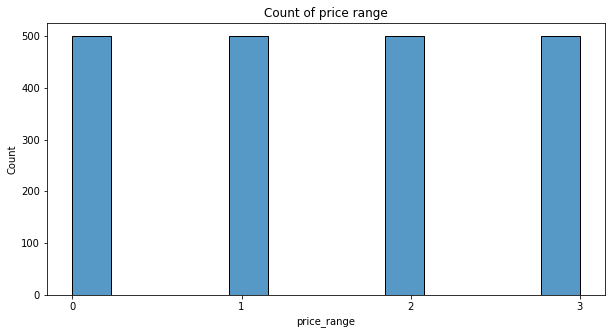

In [10]:
# Histplot to show the count of all categories

plt.figure(figsize=(10,5))
xtick=[0,1,2,3]
sns.histplot(data=df['price_range'])
plt.xticks(xtick)
plt.title('Count of price range')

* **It looks like we have equal no. of observations for each price range.**

### **Blue, four_g, three_g, dual_sim, wifi, touch_screen**

**These features have boolean type values i.e., whether or not each phone have these specification or not. So we can  analyse them together.**

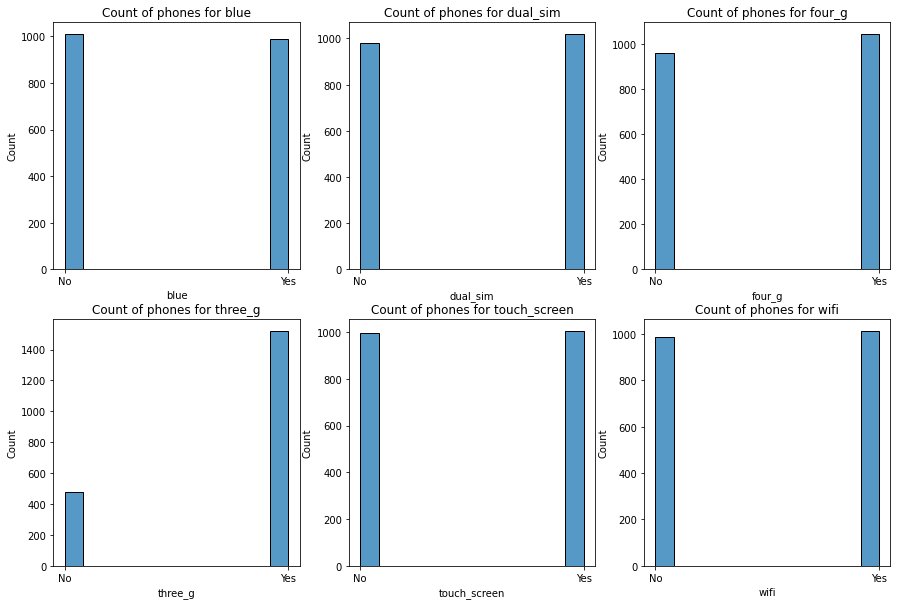

In [11]:
# creating a list of these variables

list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']



# visualizing the count of each by running a for loop

plt.figure(figsize=(15,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  xtick=[0,1]
  label=['No','Yes']
  plt.xticks(xtick,label)
  sns.histplot(df[item])
  plt.title(f'Count of phones for {item}')

* **It looks like we have almost equal no. of obseravtions for all except 3g where 75% is one class.**

### **N_cores**

**n_cores tells us the number of cores of the processor.**

In [12]:
# Extracting the no of cores we have

print('The no. of cores we have in our dataset are: ',sorted(list(df['n_cores'].unique())))

The no. of cores we have in our dataset are:  [1, 2, 3, 4, 5, 6, 7, 8]


Text(0.5, 1.0, 'Count of each cores of processor')

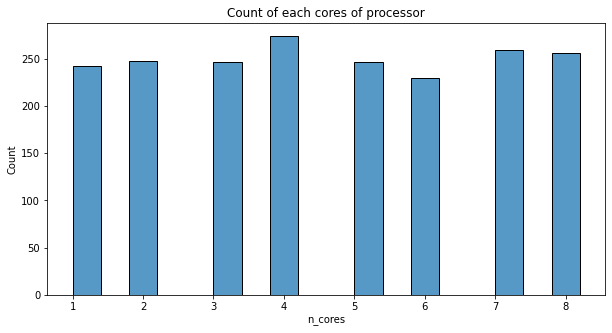

In [13]:
# Histplot to show count of each cores

plt.figure(figsize=(10,5))
sns.histplot(df['n_cores'],binwidth=0.4)
plt.title('Count of each cores of processor')

* **It looks like we have almost equal no. of observations for each cores with highest observation for n_cores=4.**

### **M_dep**

**m_dep tells us the thickness of the mobile phone.**

In [14]:
# Extracting the depth values we have

print('The m_dep values we have in our dataset are: ',sorted(list(df['m_dep'].unique())))

The m_dep values we have in our dataset are:  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


Text(0.5, 1.0, 'Count of each depth values(cm)')

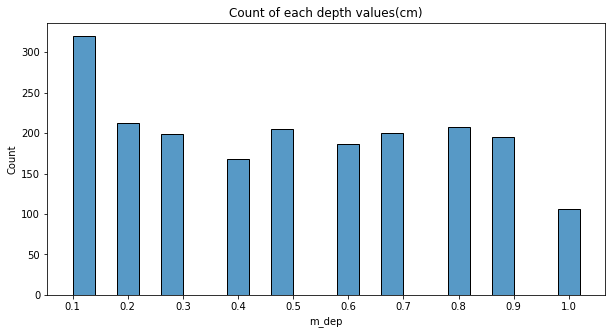

In [15]:
# Histplot to show count of each categories

plt.figure(figsize=(10,5))
xtick=sorted(list(df['m_dep'].unique()))
sns.histplot(df['m_dep'],binwidth=0.04)
plt.xticks(xtick)
plt.title('Count of each depth values(cm)')

* **There is higher no. of observations for 0.1 depth and least observations for 1 cm depth.**

### **Clock_speed, fc, pc, sc_h, sc_w, talktime (Variables having low range values)**

**Let's visualize the stats of these variables using boxplot**

Text(0.5, 1.0, 'Box plot for low range variables')

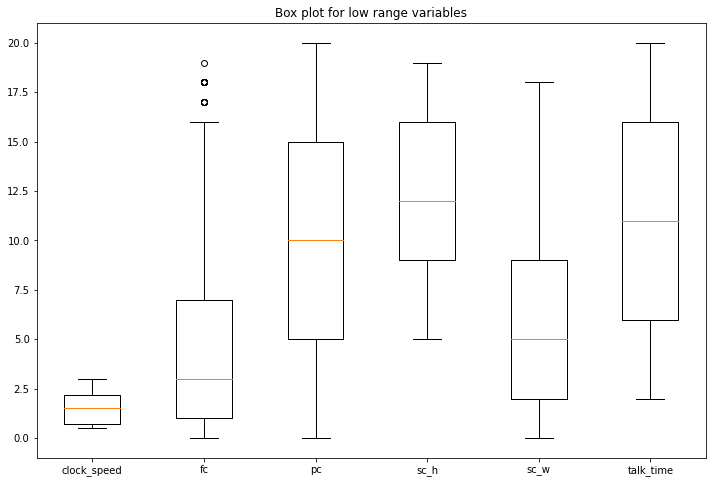

In [16]:
# Visualizing stats of these variables using box plots

plt.figure(figsize=(12,8))
xtick=[1,2,3,4,5,6]
label=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.boxplot(df[['clock_speed','fc','pc','sc_h','sc_w','talk_time']].values)
plt.xticks(xtick,label)
plt.title('Box plot for low range variables')

* **Mean value for clock speed is around 1.5 and min and max values are 3 and 0.5 respectively.**

* **Mean value of front camera(fc) and primary camera(pc)in mega pixels is around 3 and 10 and min and max values are 19, 0 for front and 20, 0 for primary.**

* **Mean value of screen height(sc_h) and screen width(sc_w) is around 12 and 5 and min and max values are 19, 5 for height and 18, o for width.**

* **Mean value of talktime is around 11 and min and max values are 20 and 2.**

### **Int_memory, mobile_wt (Variables having medium range values)**

Text(0.5, 1.0, 'Box plot for medium range variables')

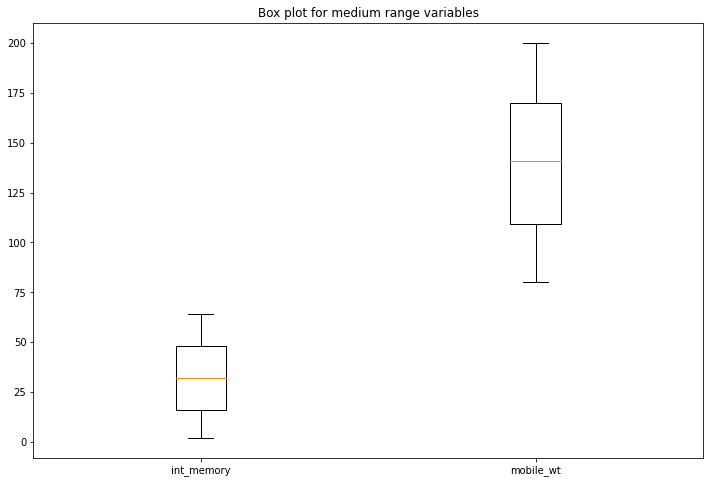

In [17]:
# Visualizing stats of these variables using box plots

plt.figure(figsize=(12,8))
xtick=[1,2]
label=['int_memory','mobile_wt']
plt.boxplot(df[['int_memory','mobile_wt']].values)
plt.xticks(xtick,label)
plt.title('Box plot for medium range variables')

* **Mean value for internal memory is around 32 and min and max values are 64 and 2.**

* **Mean value for weight is around 141 and min and max values are 200 and 80.**

### **Battery_power, px_height, px_width, ram (Variables having high range values).**

Text(0.5, 1.0, 'Box plot for high range variables')

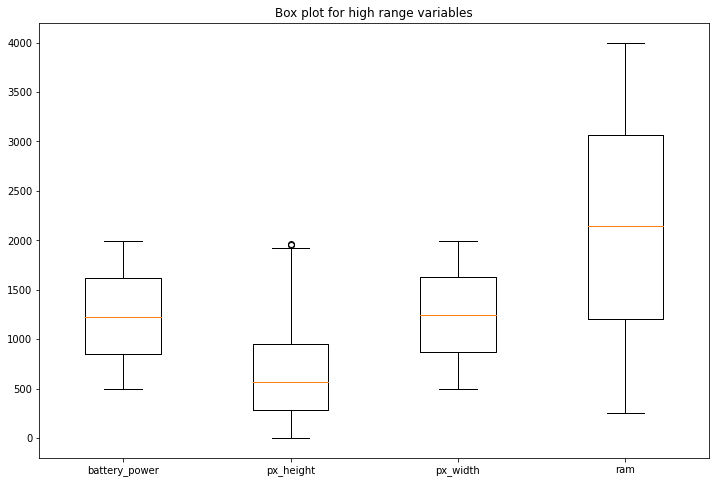

In [18]:
# Visualizing stats of these variables using box plots

plt.figure(figsize=(12,8))
xtick=[1,2,3,4]
label=['battery_power','px_height','px_width','ram']
plt.boxplot(df[['battery_power','px_height','px_width','ram']].values)
plt.xticks(xtick,label)
plt.title('Box plot for high range variables')

* **Mean value for battery power is around 1226 and min and max values are 1998 and 501.**

* **Mean value for pixel height and width is around 564 and 1247 and min and max values are 1960,0 for height and 1998,500 for width.**

* **Mean value for ram is around 2146 and min and max values are 3998 and 256.**

### **So, after doing univariate analysis, it seems like all the variables are properly structured and have a role in determining our dependent variable.**

## **3.2 Multivariate Analysis**

**In this section we will try to find relationship of each variables, their importance and impact on our dependent variable.**

### **Correlation matrix**

Text(0.5, 1.0, 'Heatmap')

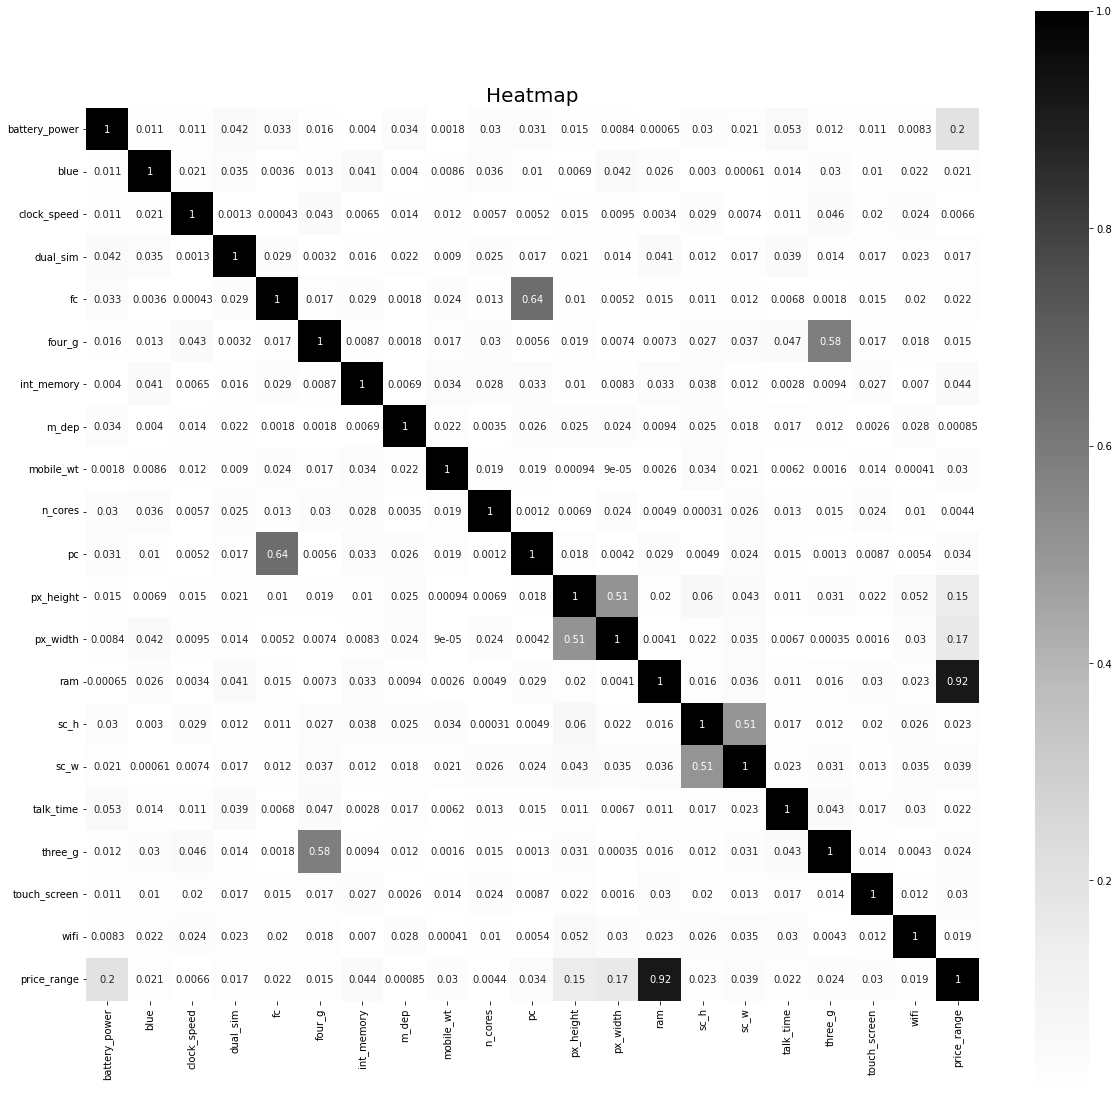

In [19]:
# Heatmap showing correlation between features

plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

**Points to note from above heatmap:**

* **pc is correlated with fc.**

* **three_g and four_g are moderately correlated.**

* **sc_h and sc_w are moderately correlated. We will try to change them into a single variable.**

* **px_width and px_height are moderately correlated. We will try to change them into a single variable.**

* **ram is highly correlated with our price range. May be one the most important factor in determining the price.**


### **n_cores and m_dep V/S price_range**

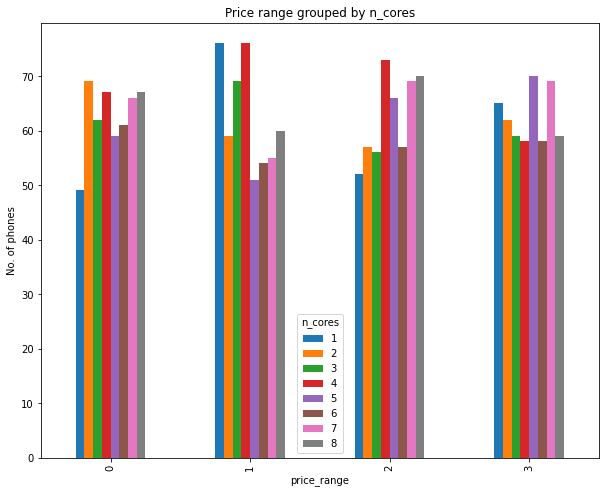

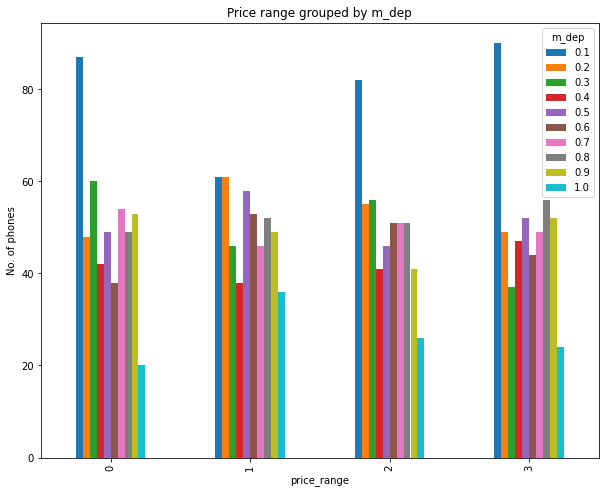

In [20]:
# Grouping price range with n_cores and m_dep and visualizing 

list1=['n_cores','m_dep']
for item in list1:
  plt.rcParams['figure.figsize']=(10,8)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

* **Count of less n_cores is high for 0 and 1 price range.**

* **Count of high n_cores is high for 2 and 3 price range.**

* **Count of phones with less thickness is high and count of phones with high thickness is low.**

### **Blue, four_g, three_g, dual_sim, wifi, touch_screen V/S price_range**

Text(0, 0.5, 'No. of phones')

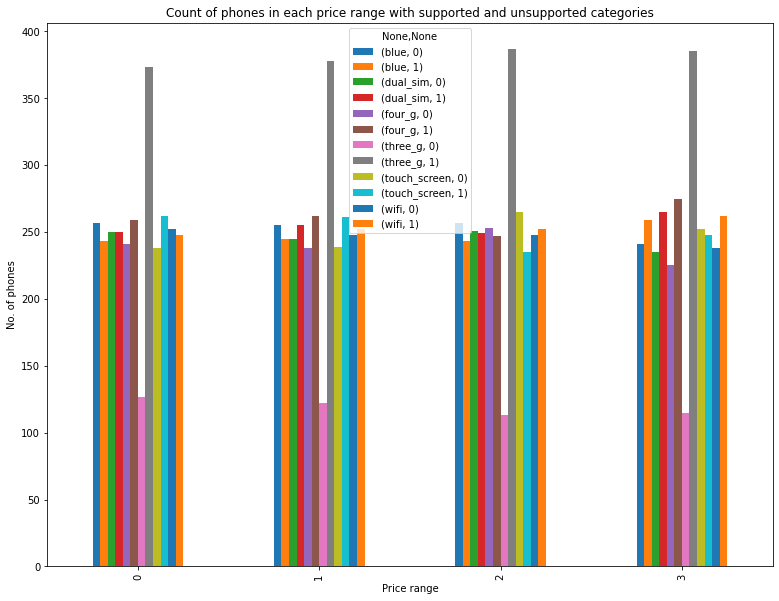

In [21]:
# Grouping price range with Blue, four_g, three_g, dual_sim, wifi, touch_screen and visualizing 

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones in each price range with supported and unsupported categories')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

* **It looks like all the price ranges have almost equal no. of observations for both supported and unsupported type specifications.**

### **Clock_speed, fc, pc, sc_h, sc_w, talk_time V/S price_range**

**Point plot shows us the estimate of central tendency of numerical type variables with estimate error.**

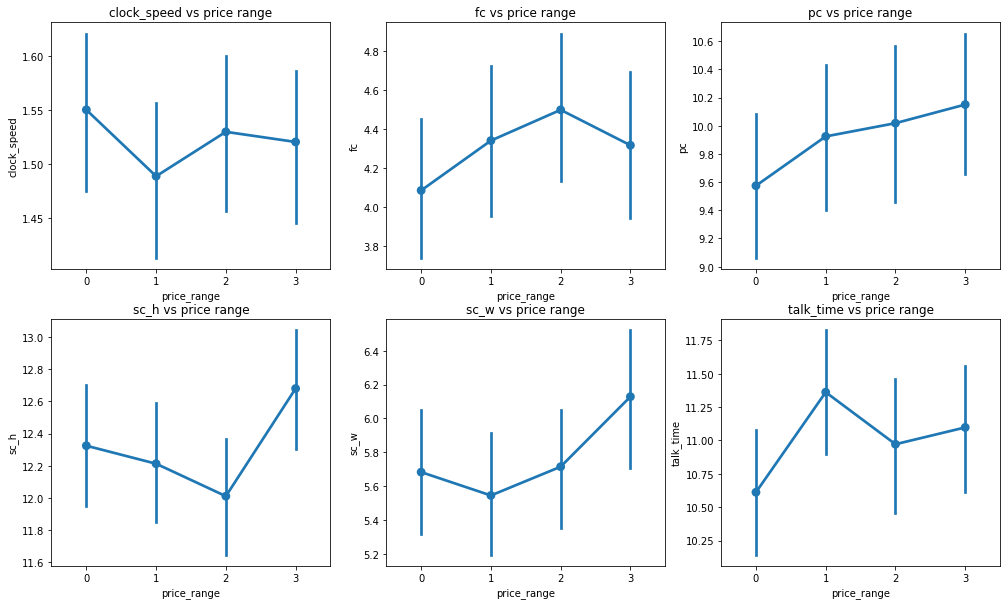

In [22]:
# Visualizing price range grouped by these variables using pointplot

list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.figure(figsize=(17,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')

* **For low range price(0), the clock speed is high.**

* **Price range is increasing with increase in front camera and primary camera megapixel.**

* **Screen height and width decrease initially for increase in price range but then increses.**

* **Talk time is higher for high range phones comparatively.**

### **Int_memory, mobile_wt V/S price_range**

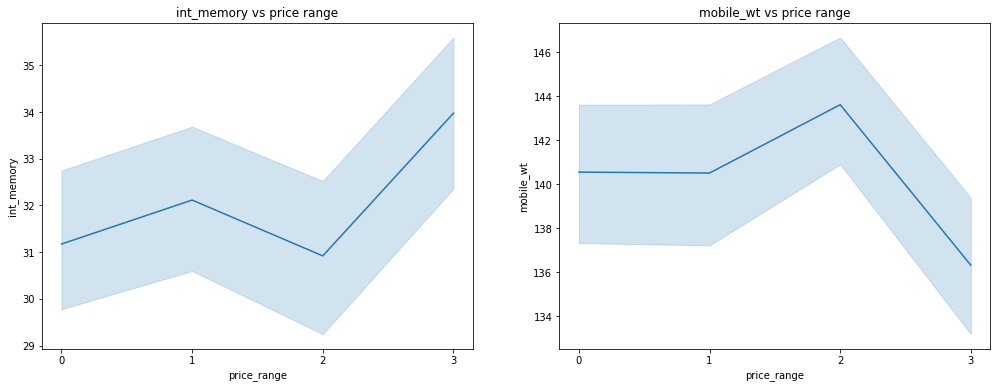

In [23]:
# Visualizing price range grouped by these variables using lineplot

list1=['int_memory','mobile_wt']
plt.figure(figsize=(17,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,2,index+1)
  sns.lineplot(x='price_range',y=item,data=df)
  plt.xticks(xtick)
  plt.title(f'{item} vs price range')

* **There is drastic increase in internal memory for very high prices.**

* **Also there is drastic decrease in mobile weight for very high prices.**

### **Battery_power, px_height, px_width, ram V/S price_range**

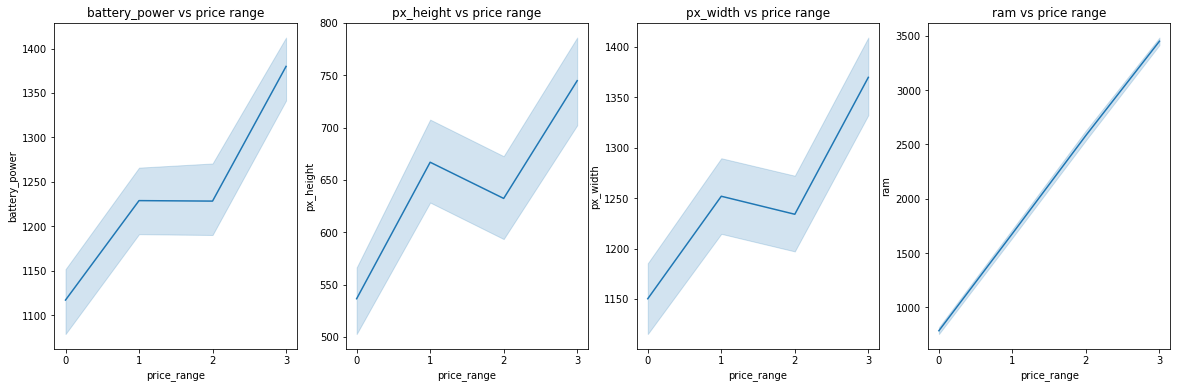

In [24]:
# Visualizing price range grouped by these variables using lineplot

list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')

* **It looks like the values of these variables are in increasing trend with increase in prices.**
* **Ram is having a direct impact. Higher ram is equal to higher prices.**

# **4. Data Wrangling**

**In this section we try to find any missing values, outliers, which can have a drastic impact on the performance of the models. We also try to modify our datasets by adding columns, removing columns, transforming columns, merging datasets and many more.**

## **4.1 Missing(null) values**

**Let's check for Nan values.**

In [25]:
# Checking for Null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* **Great! We dont have any missing values in our dataset.**

## **4.2 Outliers**

**Let's check for outliers.**

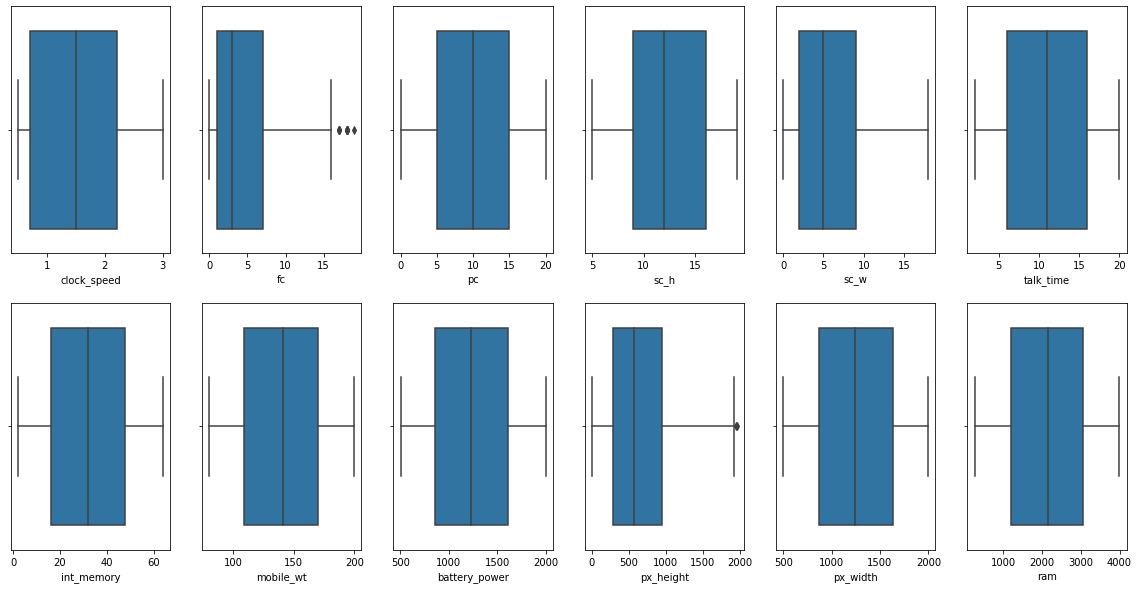

In [26]:
# Checking outliers for discrete and continous type variables using box plot

list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time','int_memory','mobile_wt','battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,10))
for index,item in enumerate(list1):
  plt.subplot(2,6,index+1)
  sns.boxplot(df[item])

* **Great! It looks like we dont have any outliers except in fc which can be considered negligible as they are not that far away from the maximum value.**

## **4.3 Feature Engineering**

**In this section we will try to modify some columns and form new columns.**

In [27]:
# First make copy of dataset before making changes

mobile_df_copy=df.copy()

* **Earlier we saw px_height and px_width were moderately correlated. Also they are dimensions. Therefore we will convert 2 columns into single one.**

* **Also we saw sc_h and sc_w were moderately correlated. These are dimensions too. Thus, we will convert these 2 columns into a single one.**

In [28]:
# Creating new column px_area from px_height and px_weight

mobile_df_copy['px_area']=mobile_df_copy['px_height']*mobile_df_copy['px_width']

In [29]:
# Creating new column sc_area from sc_h and sc_w

mobile_df_copy['sc_area']=mobile_df_copy['sc_h']*mobile_df_copy['sc_w']

**Now, we can drop those earlier columns from our dataset.**

In [30]:
# Dropping columns

mobile_df_copy.drop(columns=['px_height','px_width','sc_h','sc_w',],inplace=True)

In [31]:
# Let's check first 5 rows of our modified dataset

mobile_df_copy.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,1464096,16


* **Great! 2 new columns have been added and 4 old columns have been deleted and our independent features have reduced from 20 to 18.**

### **Now our dataset is ready for modelling.**

# **5. Splitting the data and Standardization**

**Let's split the data into training and test set and also scale the data before feeding them to models.**

In [32]:
# creating independent features

X=mobile_df_copy.drop(columns='price_range')

In [33]:
# creating dependent/target variable

y=mobile_df_copy['price_range']

In [34]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # random_state=0 to ensure same observations in each set everytime we run 

In [35]:
# checking the shapes

print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(1600, 18), X_test=(400, 18)
The shapes of train and test set for dependent variables are: y_train=(1600,), y_test=(400,)


**To scale the data we will be using StandardScaler.**

In [36]:
# before transformation 

X_train.values

array([[1.232000e+03, 0.000000e+00, 2.900000e+00, ..., 0.000000e+00,
        2.920490e+05, 1.600000e+02],
       [1.840000e+03, 0.000000e+00, 5.000000e-01, ..., 0.000000e+00,
        4.804950e+05, 0.000000e+00],
       [1.692000e+03, 0.000000e+00, 2.100000e+00, ..., 1.000000e+00,
        3.615696e+06, 2.700000e+01],
       ...,
       [1.190000e+03, 0.000000e+00, 2.000000e+00, ..., 1.000000e+00,
        2.302754e+06, 9.100000e+01],
       [1.191000e+03, 0.000000e+00, 2.400000e+00, ..., 1.000000e+00,
        3.245270e+05, 8.400000e+01],
       [7.060000e+02, 0.000000e+00, 5.000000e-01, ..., 1.000000e+00,
        5.093340e+05, 5.600000e+01]])

In [37]:
# standardizing the independent variables

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [38]:
# after transformation

X_train

array([[-1.60788581e-03, -9.65591606e-01,  1.67103471e+00, ...,
        -1.02532046e+00, -7.58191581e-01,  1.01820988e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.27055019e+00, ...,
        -1.02532046e+00, -5.31979908e-01, -1.04823795e+00],
       [ 1.03920474e+00, -9.65591606e-01,  6.90506414e-01, ...,
         9.75304830e-01,  3.23153358e+00, -6.99524876e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  5.67940376e-01, ...,
         9.75304830e-01,  1.65547038e+00,  1.27054253e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.05820453e+00, ...,
         9.75304830e-01, -7.19204801e-01,  3.66471606e-02],
       [-1.19175450e+00, -9.65591606e-01, -1.27055019e+00, ...,
         9.75304830e-01, -4.97361405e-01, -3.24981208e-01]])

**Great! Now we are ready to fit our models.**

# **6. Fitting Models**

* **In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: Random Forest Classifier, XGBoost Classifier.**

* **The detailed step we will be following are as follows:**

1. **Initial fitting of the model.**

2. **Evaluating the performance of the model using metrics.**

3. **Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.**

## **6.1 Random Forest Classifier**

**Initial fitting (with default hyperparameters)**

In [39]:
# creating instance of random forest and fitting data

rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
# predicting for both train and test

y_pred_train1=rf_model.predict(X_train)
y_pred_test1=rf_model.predict(X_test)

In [41]:
# checking predicted values for test set

y_pred_test1

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 2, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 1, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 0,

**Evaluation metrics**

1. Accuracy : Accuracy is defined as the ratio of correct predictions to actual predictions.

2. Precision : Precision for a label is defined as the number of true positives divided by the number of predicted positives.

3. Recall : Recall for a label is defined as the number of true positives divided by the total number of actual positives.

4. F1-Score : This is defined as the harmonic mean of precision and recall.

Also, a confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [42]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train1))
print('The precision of training set = ',precision_score(y_train,y_pred_train1,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train1,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train1,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train1))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  1.0
The precision of training set =  [1. 1. 1. 1.]
The recall of training set =  [1. 1. 1. 1.]
The f1 score of training set =  [1. 1. 1. 1.]
The confusion matrix of training set = 
 [[405   0   0   0]
 [  0 408   0   0]
 [  0   0 401   0]
 [  0   0   0 386]]


In [43]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test1))
print('The precision of test set = ',precision_score(y_test,y_pred_test1,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test1,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test1,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test1))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.89
The precision of test set =  [0.91262136 0.78640777 0.85714286 1.        ]
The recall of test set =  [0.98947368 0.88043478 0.78787879 0.90350877]
The f1 score of test set =  [0.94949495 0.83076923 0.82105263 0.94930876]
The confusion matrix of test set = 
 [[ 94   1   0   0]
 [  9  81   2   0]
 [  0  21  78   0]
 [  0   0  11 103]]


In [44]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.79      0.88      0.83        92
           2       0.86      0.79      0.82        99
           3       1.00      0.90      0.95       114

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



* **Accuracy score for train set is 1.0 and acuuracy score for test set is 0.89. So, this means there is overfitting in our model.**

**Let's store metric values of train and test set for later comparisons.**

In [45]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train1),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=pd.DataFrame(dict1,index=[0])

In [46]:
# storing metric values in test df for later comparisons

dict2={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test1),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=pd.DataFrame(dict2,index=[0])

### **We need to tune hyperparameters to prevent overfitting.**

**Cross-validation using RandomSearch**

In [47]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(50,200,10,dtype='int64'))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(40,80,10,dtype='int64'))

# Max Features
max_features=['auto','log2']

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features':max_features}

In [48]:
# Random search

rf_random = RandomizedSearchCV(estimator=rf_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [49]:
# checking the best estimator

rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=130,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
# checking the best parameters

rf_random.best_params_

{'max_depth': 24,
 'max_features': 'auto',
 'min_samples_leaf': 40,
 'min_samples_split': 130,
 'n_estimators': 180}

In [51]:
# storing the best estimator in a variable

rf_optimal_model1=rf_random.best_estimator_

In [52]:
# predicting on both train and test

y_pred_train2=rf_optimal_model1.predict(X_train)
y_pred_test2=rf_optimal_model1.predict(X_test)

In [53]:
# looking the predicted values for test set

y_pred_test2

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 1, 3, 0, 3, 1, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 2, 3, 0, 0, 0, 2, 0,
       1, 3, 1, 2, 1, 1, 0, 3, 2, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       1, 0, 3, 3, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 0, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 1, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 0, 0,

In [54]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.859375
The precision of training set =  [0.88340807 0.77641278 0.83473389 0.94102564]
The recall of training set =  [0.97283951 0.7745098  0.74314214 0.9507772 ]
The f1 score of training set =  [0.92596945 0.77546012 0.78627968 0.94587629]
The confusion matrix of training set = 
 [[394  11   0   0]
 [ 52 316  40   0]
 [  0  80 298  23]
 [  0   0  19 367]]


In [55]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.815
The precision of test set =  [0.86238532 0.66981132 0.76623377 0.94444444]
The recall of test set =  [0.98947368 0.77173913 0.5959596  0.89473684]
The f1 score of test set =  [0.92156863 0.71717172 0.67045455 0.91891892]
The confusion matrix of test set = 
 [[ 94   1   0   0]
 [ 15  71   6   0]
 [  0  34  59   6]
 [  0   0  12 102]]


In [56]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        95
           1       0.67      0.77      0.72        92
           2       0.77      0.60      0.67        99
           3       0.94      0.89      0.92       114

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



**After hyperparameter tuning using RandomSearch:**

* **Accuracy score for train set is 0.86 and acuuracy score for test set is 0.81.**

**Now let's try cross-validation using BayesSearch**

In [57]:
# installing Bayes Search

! pip install scikit-optimize
from skopt import BayesSearchCV

     |████████████████████████████████| 101 kB 6.6 MB/s 


In [58]:
# creating a bayes model

rf_bayes = BayesSearchCV(estimator=rf_model,
                       search_spaces = {
                          'max_depth': (4,8),
                          'min_samples_leaf': (10,100),
                          'min_samples_split': (50,150),
                          'n_estimators': (80,200)
                        },
                       cv = 5, scoring='accuracy',random_state=0)

rf_bayes.fit(X_train,y_train)

BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=...
                                               oob_score=False, random_state=0,
                   

In [59]:
# checking the best estimator

rf_bayes.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
# checking the best parameters

rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 50),
             ('n_estimators', 200)])

In [61]:
# storing the best estimator in a variable

rf_optimal_model2=rf_bayes.best_estimator_

In [62]:
# predicting on both train and test

y_pred_train3=rf_optimal_model2.predict(X_train)
y_pred_test3=rf_optimal_model2.predict(X_test)

In [63]:
# looking the predicted values for test set

y_pred_test3

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 1, 3, 0, 2, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       1, 3, 1, 2, 1, 1, 0, 3, 2, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       1, 0, 3, 3, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 1, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 0, 0,

In [64]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train3))
print('The precision of training set = ',precision_score(y_train,y_pred_train3,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train3,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train3,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train3))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.9075
The precision of training set =  [0.93301435 0.84146341 0.87563452 0.98412698]
The recall of training set =  [0.96296296 0.84558824 0.86034913 0.96373057]
The f1 score of training set =  [0.94775213 0.84352078 0.86792453 0.97382199]
The confusion matrix of training set = 
 [[390  15   0   0]
 [ 28 345  35   0]
 [  0  50 345   6]
 [  0   0  14 372]]


In [65]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test3))
print('The precision of test set = ',precision_score(y_test,y_pred_test3,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test3,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test3,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test3))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.8325
The precision of test set =  [0.88679245 0.71568627 0.75862069 0.95238095]
The recall of test set =  [0.98947368 0.79347826 0.66666667 0.87719298]
The f1 score of test set =  [0.93532338 0.75257732 0.70967742 0.91324201]
The confusion matrix of test set = 
 [[ 94   1   0   0]
 [ 12  73   7   0]
 [  0  28  66   5]
 [  0   0  14 100]]


In [66]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        95
           1       0.72      0.79      0.75        92
           2       0.76      0.67      0.71        99
           3       0.95      0.88      0.91       114

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



**After hyperparameter tuning using BayesSearch:**

* **We are getting an accuracy of 0.90 and 0.83 for training and test set respectively. So, the difference is around 7.**

### **It looks like the best hyperparameters are given by RandomSearch rather than BayesSearch.**

**So, let's store the scores of RandomSearch for later comparisons.**

In [67]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
training_df=training_df.append(dict1,ignore_index=True)

In [68]:
# storing metric values in test df for later comparisons

dict2={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
test_df=test_df.append(dict2,ignore_index=True)

## **6.2 XGBoost Classifier**

**Initial fitting (with default hyperparameters)**

In [69]:
# implementing XGBoost classifier

xgb_model=XGBClassifier(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
# predicting for both training and test set

y_pred_train4=xgb_model.predict(X_train)
y_pred_test4=xgb_model.predict(X_test)

In [71]:
# looking the predicted values for test set

y_pred_test4

array([3, 0, 2, 1, 2, 0, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 2,
       1, 3, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 3, 2, 1, 2, 2, 1, 2,
       3, 2, 2, 2, 3, 1, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 1, 0,
       2, 3, 1, 2, 2, 1, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 2, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 1, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 2, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 1, 3, 1, 1, 0, 3, 3, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

**Evaluating perfomance**

In [72]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train4))
print('The precision of training set = ',precision_score(y_train,y_pred_train4,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train4,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train4,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train4))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.97875
The precision of training set =  [0.995      0.95923261 0.97236181 0.98961039]
The recall of training set =  [0.98271605 0.98039216 0.96508728 0.98704663]
The f1 score of training set =  [0.98881988 0.96969697 0.96871089 0.98832685]
The confusion matrix of training set = 
 [[398   7   0   0]
 [  2 400   6   0]
 [  0  10 387   4]
 [  0   0   5 381]]


In [73]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test4))
print('The precision of test set = ',precision_score(y_test,y_pred_test4,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test4,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test4,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test4))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.8725
The precision of test set =  [0.94897959 0.78703704 0.77777778 0.98947368]
The recall of test set =  [0.97894737 0.92391304 0.77777778 0.8245614 ]
The f1 score of test set =  [0.96373057 0.85       0.77777778 0.89952153]
The confusion matrix of test set = 
 [[93  2  0  0]
 [ 5 85  2  0]
 [ 0 21 77  1]
 [ 0  0 20 94]]


In [74]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.79      0.92      0.85        92
           2       0.78      0.78      0.78        99
           3       0.99      0.82      0.90       114

    accuracy                           0.87       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.87      0.87       400



**With default hyperparameters:**

* **Accuracy score for train set is 0.97 and acuuracy score for test set is 0.87. So, this means there is overfitting in our model.**

**Let's store metric values of train and test set for later comparisons.**

In [75]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train4),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=training_df.append(dict1,ignore_index=True)

In [76]:
# storing metric values in train df for later comparisons

dict2={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test4),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=test_df.append(dict2,ignore_index=True)

### **We need to tune hyperparameters to prevent overfitting.**

**First let's do cross-validation using RandomSearch**

In [77]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(5,15,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))

# min childs weight
min_child_weight=list(np.linspace(10,20,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [78]:
# Random search

xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                 

In [79]:
# checking th ebest estimator

xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.13, max_delta_step=0, max_depth=13,
              min_child_weight=10, missing=None, n_estimators=13, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [80]:
# checking the best parameters

xgb_random.best_params_

{'gamma': 1,
 'learning_rate': 0.13,
 'max_depth': 13,
 'min_child_weight': 10,
 'n_estimators': 13,
 'subsample': 0.5}

In [81]:
# storing the best estimator in a variable

xgb_optimal_model1=xgb_random.best_estimator_

In [82]:
# predicting on both train and test

y_pred_train5=xgb_optimal_model1.predict(X_train)
y_pred_test5=xgb_optimal_model1.predict(X_test)

In [83]:
# looking the predicted values for test set

y_pred_test5

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 1, 3, 0, 2, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 1, 3, 2, 2, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 1, 0, 3, 2, 3, 0, 3, 1, 2, 3, 1, 3, 2, 2, 2, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 1, 2, 3, 0, 1, 3,
       1, 0, 3, 3, 2, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 0, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 0, 0,

In [84]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',round(accuracy_score(y_train,y_pred_train5),2))
print('The precision of training set = ',precision_score(y_train,y_pred_train5,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train5,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train5,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train5))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.89
The precision of training set =  [0.9192399  0.86040609 0.83497537 0.93403694]
The recall of training set =  [0.95555556 0.83088235 0.84538653 0.91709845]
The f1 score of training set =  [0.937046   0.84538653 0.8401487  0.9254902 ]
The confusion matrix of training set = 
 [[387  18   0   0]
 [ 34 339  35   0]
 [  0  37 339  25]
 [  0   0  32 354]]


In [85]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',round(accuracy_score(y_test,y_pred_test5),2))
print('The precision of test set = ',precision_score(y_test,y_pred_test5,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test5,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test5,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test5))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.85
The precision of test set =  [0.89320388 0.78       0.77659574 0.93203883]
The recall of test set =  [0.96842105 0.84782609 0.73737374 0.84210526]
The f1 score of test set =  [0.92929293 0.8125     0.75647668 0.88479263]
The confusion matrix of test set = 
 [[92  3  0  0]
 [11 78  3  0]
 [ 0 19 73  7]
 [ 0  0 18 96]]


In [86]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.78      0.85      0.81        92
           2       0.78      0.74      0.76        99
           3       0.93      0.84      0.88       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



**After hyperparameter tuning using RandomSearch:**

* **Accuracy score for train set is 0.89 and acuuracy score for test set is 0.85.**

**Now let's try cross-validation using BayesSearch**

In [87]:
# creating a bayes model

xgb_bayes = BayesSearchCV(estimator=xgb_model,
                       search_spaces = {
                          'max_depth': (4,20),
                          'n_estimators': (10,50),
                          'min_child_weight': (2,20),
                          'learning_rate':(0.05,0.15),
                          'gamma':(1,5)
                        },
                       cv = 5, scoring='accuracy',random_state=0)

xgb_bayes.fit(X_train,y_train)

BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=1, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=3, min_child_weight=1,
                                      missing=None, n_estimators=100, n_jobs=-1,
                                      nthread=None, objective='multi:softprob',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      sca...=None,
                                      silent=None, subsample=1, verbosity=1),
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=0,
              refit=True, return_train_score=False, scoring='accuracy',


In [88]:
# checking th ebest estimator

xgb_bayes.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.14959481327549834, max_delta_step=0, max_depth=20,
              min_child_weight=4, missing=None, n_estimators=48, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [89]:
# checking the best parameters

xgb_bayes.best_params_

OrderedDict([('gamma', 1),
             ('learning_rate', 0.14959481327549834),
             ('max_depth', 20),
             ('min_child_weight', 4),
             ('n_estimators', 48)])

In [90]:
# storing the best estimator in a variable

xgb_optimal_model2=xgb_bayes.best_estimator_

In [91]:
# predicting on both train and test

y_pred_train6=xgb_optimal_model2.predict(X_train)
y_pred_test6=xgb_optimal_model2.predict(X_test)

In [92]:
# looking the predicted values for test set

y_pred_test6

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 1, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 1, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 2, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 1, 3, 1, 1, 0, 3, 3, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [93]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train6))
print('The precision of training set = ',precision_score(y_train,y_pred_train6,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train6,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train6,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train6))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.994375
The precision of training set =  [0.9950495  0.98777506 0.99501247 1.        ]
The recall of training set =  [0.99259259 0.99019608 0.99501247 1.        ]
The f1 score of training set =  [0.99381953 0.98898409 0.99501247 1.        ]
The confusion matrix of training set = 
 [[402   3   0   0]
 [  2 404   2   0]
 [  0   2 399   0]
 [  0   0   0 386]]


In [94]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test6))
print('The precision of test set = ',precision_score(y_test,y_pred_test6,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test6,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test6,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test6))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.8925
The precision of test set =  [0.93877551 0.80769231 0.83505155 0.99009901]
The recall of test set =  [0.96842105 0.91304348 0.81818182 0.87719298]
The f1 score of test set =  [0.95336788 0.85714286 0.82653061 0.93023256]
The confusion matrix of test set = 
 [[ 92   3   0   0]
 [  6  84   2   0]
 [  0  17  81   1]
 [  0   0  14 100]]


In [95]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test6))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        95
           1       0.81      0.91      0.86        92
           2       0.84      0.82      0.83        99
           3       0.99      0.88      0.93       114

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



**After hyperparameter tuning using BayesSearch:**

* **We are getting an accuracy of 0.99 and 0.89 for training and test set respectively. So, the difference is around 10.**

### **It looks like the best hyperparameters are given by RandomSearch rather than BayesSearch.**

**So, let's store the scores of RandomSearch for later comparisons.**

In [96]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train5),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train5,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train5,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train5,average=None),decimals=2))],
       'Comments':'Best of all model'}
training_df=training_df.append(dict1,ignore_index=True)

In [97]:
# storing metric values in train df for later comparisons

dict2={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test5),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test5,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test5,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test5,average=None),decimals=2))],
       'Comments':'Best of all model'}
test_df=test_df.append(dict2,ignore_index=True)

### **Let's check training and test set values that has been obtained from our models.**

In [98]:
# checking the training set values

training_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,1.00,"[1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0]",Possible overfitting
1,Random Forest - After hyperparameter tuning,0.86,"[[0.88, 0.78, 0.83, 0.94]]","[[0.97, 0.77, 0.74, 0.95]]","[[0.93, 0.78, 0.79, 0.95]]",Reduced overfitting
2,XGBoost - Before hyperparameter tuning,0.98,"[[1.0, 0.96, 0.97, 0.99]]","[[0.98, 0.98, 0.97, 0.99]]","[[0.99, 0.97, 0.97, 0.99]]",Possible overfitting
3,XGBoost - After hyperparameter tuning,0.89,"[[0.92, 0.86, 0.83, 0.93]]","[[0.96, 0.83, 0.85, 0.92]]","[[0.94, 0.85, 0.84, 0.93]]",Best of all model


In [99]:
# checking the test set values

test_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,0.89,"[0.91, 0.79, 0.86, 1.0]","[0.99, 0.88, 0.79, 0.9]","[0.95, 0.83, 0.82, 0.95]",Possible overfitting
1,Random Forest - After hyperparameter tuning,0.82,"[[0.86, 0.67, 0.77, 0.94]]","[[0.99, 0.77, 0.6, 0.89]]","[[0.92, 0.72, 0.67, 0.92]]",Reduced overfitting
2,XGBoost - Before hyperparameter tuning,0.87,"[[0.95, 0.79, 0.78, 0.99]]","[[0.98, 0.92, 0.78, 0.82]]","[[0.96, 0.85, 0.78, 0.9]]",Possible overfitting
3,XGBoost - After hyperparameter tuning,0.85,"[[0.89, 0.78, 0.78, 0.93]]","[[0.97, 0.85, 0.74, 0.84]]","[[0.93, 0.81, 0.76, 0.88]]",Best of all model


**After having experimented two machine learning algorithms namely; Random forest and Xgboost, we can say that the best performance is given by xgboost model with accuracies of 0.89 and 0.85 for training and test set respectively using RandomSearch.** 

**The best hyperparameter values are:**

1. **learning rate = 0.13**

2. **n_estimators = 13**

3. **max_depth = 13**

4. **min_child_weight = 10**

5. **gamma = 1**

6. **subsample = 0.5**

# **7. Model Explainability**

**Model Explainability is the process of explaining and interpreting machine learning models. It is a way to know what is going on inside the model and how it is able to produce the desired results.**

**Here we are going to implement 'shap' techniques to understand our model behaviour.**

**SHAP stands for SHapley Additive exPlanations. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we would make if that feature took some baseline value.**

In [100]:
# importing shap

!pip install shap
import shap
shap.initjs()

     |████████████████████████████████| 356 kB 13.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491636 sha256=fc13082307eed442ade2d8bcbb86512363bdb2332b5f508a0a77c5fde1eb6cb6
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [101]:
# creating a shap instance for training set

l=X.columns.to_list()
X_train_val=pd.DataFrame(X_train,columns=l)
explainer_train = shap.TreeExplainer(xgb_optimal_model1)
shap_values_train = explainer_train.shap_values(X_train_val)

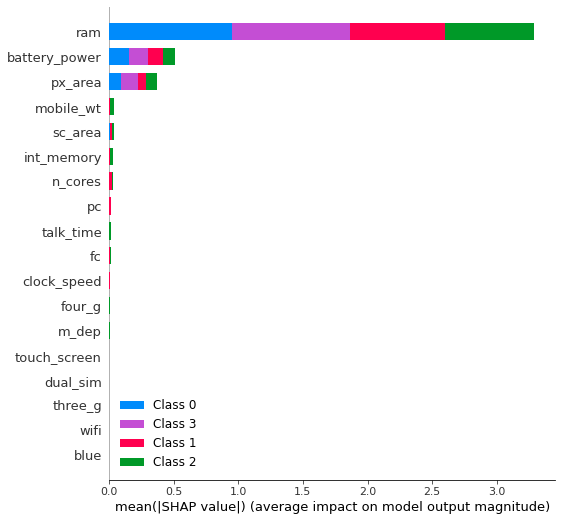

In [102]:
# visualizing

shap.summary_plot(shap_values_train,X_train_val,plot_type='bar')

In [103]:
# creating a shap instance for test set

X_test_val=pd.DataFrame(X_test,columns=l)
explainer_train = shap.TreeExplainer(xgb_optimal_model1)
shap_values_test = explainer_train.shap_values(X_test_val)

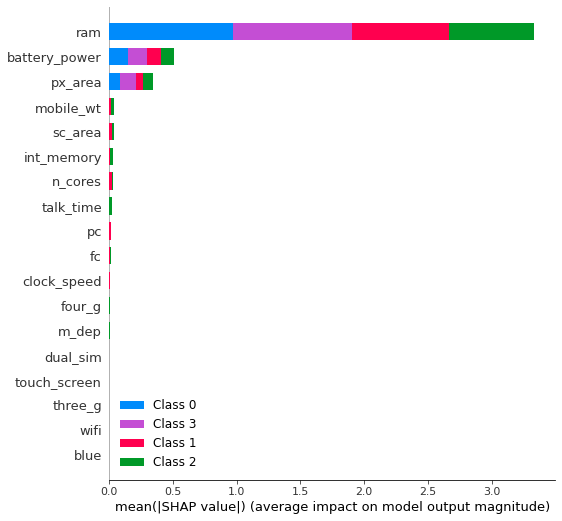

In [104]:
# visualize

shap.summary_plot(shap_values_test,X_test_val,plot_type='bar')

**Observations from the summary plot are:**

* **The most important features in determining the predictions are ram, battery power, px_height.**

* **Higher values of ram are increasing the predicted class.**

* **Higher values of battery power are increasing the predicted class.**

* **Higher values of px_height and px_weight are increasing the predicted class.**

### **Let us now find the dependence plot that tells the relationship of two variable that has a effect on predictions.**

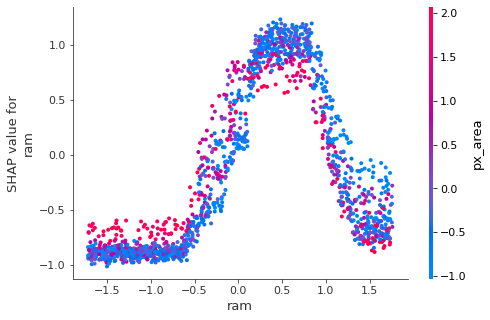

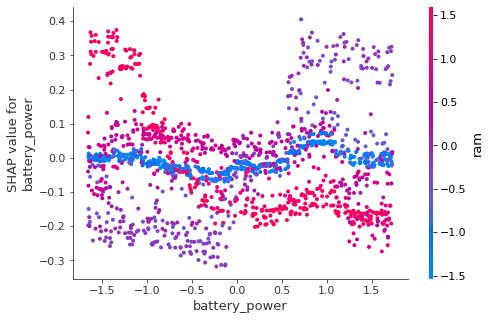

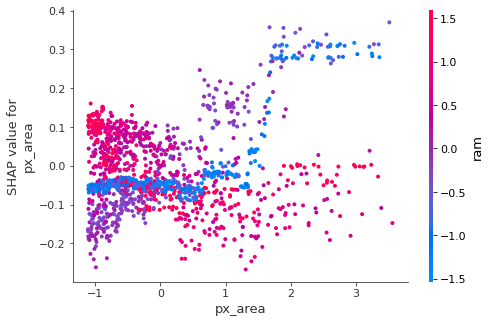

In [105]:
# finding dependence plot for top 5 features for 0 category

top_vars = ['ram', 'battery_power','px_area']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train[2], X_train_val)

* **Here we can observe how dependence of two variables are influencing the predicted outcomes.** 

* **We can see higher values of ram and higher values of battery power are increasing shap values i.e., increasing predicted value.** 

* **Similarly we can observe each variables and their impact on each predicted outcome.**

# **8. Conclusion**

###Thats it! We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our predictions for the mobile price range. We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications.
--------------------------------------------------------------------------------
###Finally we implemented 2 machine learning algorithms namely; RandomForest and XGBoost. We tried hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by our XGBoost model.
-------------------------------------------------------------------------------
###We also implemented shap techniques to identify the important features impacting our model predictions. We saw ram, battery power, px_height and px_weight were the major contributors. Higher the values of these led to higher predicted values.
--------------------------------------------------------------------------------
###The accuracy of our best model was 0.89 and 0.85 for training and test set respectively. Although, the difference is still 4, considering the simplicity and less no. of observations, this can be considered a good model. Performance can be improved even further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and become less prone to overfitting. With evolution of new technology, these numbers can change in future hence there will always be a need to check on the model from time to time. I hope this exercise will help you to take a step forward!